In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns

from simulations.automata.models import CA1DEnsemble

In [ ]:
t = CA1DEnsemble(252, 100, 10, init='sparse', folder="../simulations/automata/results/")
t.run(100)
t.analyse()
t.plot()

https://plato.stanford.edu/entries/cellular-automata/supplement.html

### Candidate statistical rules
30, 182, 181, 167, 165, 121, 105

### Candidate complex rules
13
201
133
199
195
183?

73
70

169

220,
5,
1,
12,
248,
234,

218
225

99 (pyramids)


### Candidate mechanistic
0,8,253, 251,168, (flats out)
236
127

### Not sure if mechanistic or complex
4, 196

7 (mostly mechanistic flip flop, with some stripes)

### Perplexing as diagnoal
2
3
10
247

### Interesting
252, 254, 250, (has peaks at the beginning - so is complex initially, then becomes mechanistic)



In [37]:
from IPython.display import clear_output

def generate_for_all(cells, ensembles, timesteps, save=False):
    lots = {}
    for r in range(0,255):
        clear_output(wait=True)
        print("Running rule %s" % r)
        y = CA1DEnsemble(r, cells, ensembles, init='sparse', folder="../simulations/automata/results/")
        y.run(timesteps, save)
        print("Analysing")
        y.analyse()
        y.save()
        #y.load()
        lots[r] = y
    return lots

def load_for_all(cells, ensembles):
    lots = {}
    for r in range(0,255):
        y = CA1DEnsemble(r, cells, ensembles, init='sparse', folder="../simulations/automata/results/")
        y.load()
        lots[r] = y
    return lots

def complexity_data(lots):
    compl = []
    for l in lots.values():
        d =l.get_analysis('complexity')
        d['Rule'] = l.rule
        compl.append(d)
    return pd.concat(compl)

# melted = merged.loc[:, [False, True, False, True, True, True]].melt(id_vars='Rule')

def plot(melted):
    sns.set(rc={"figure.figsize":(15, 10)})
    g = sns.scatterplot(data=melted,
                    x='Rule', y='value', hue='variable',
                    style='variable', palette='rocket')
    g.legend(bbox_to_anchor = (1.03, 1))

In [36]:
from IPython.display import clear_output

lots = {}
for r in range(0,255):
    clear_output(wait=True)
    print("Running rule %s" % r)
    y = CA1DEnsemble(r, 200, 5, init='sparse', folder="../simulations/automata/results/")
    y.run(200, True)
    print("Analysing")
    y.analyse()
    y.save()
    #y.load()
    lots[r] = y

Running rule 254
Analysing


In [7]:
compl = []
for l in lots.values():
    d =l.get_analysis('complexity')
    d['Rule'] = l.rule
    compl.append(d)

merged = pd.concat(compl)
melted = pd.melt(merged, id_vars='Rule')
merged

,Avg Cell Entropy,Avg Stable Cell Entropy,Last Cell Entropy,Stable diag LR,Stable diag RL,Rule
21,0.204863,0.000000,0.000000,0.000000,0.000000,0
21,0.128234,0.128242,0.018047,0.004686,0.005455,1
21,0.015987,0.015988,0.015988,0.019816,1.000000,2
21,0.000305,0.000314,0.022768,0.004256,0.006829,3
21,0.998933,1.000000,0.011585,0.024536,0.022057,4
...,...,...,...,...,...,...
21,0.048880,0.000000,0.000000,0.000000,0.000000,250
21,0.002412,0.000000,0.000000,0.000000,0.000000,251
21,0.094923,0.000000,0.000000,0.000000,0.000000,252
21,0.015898,0.000000,0.000000,0.000000,0.000000,253


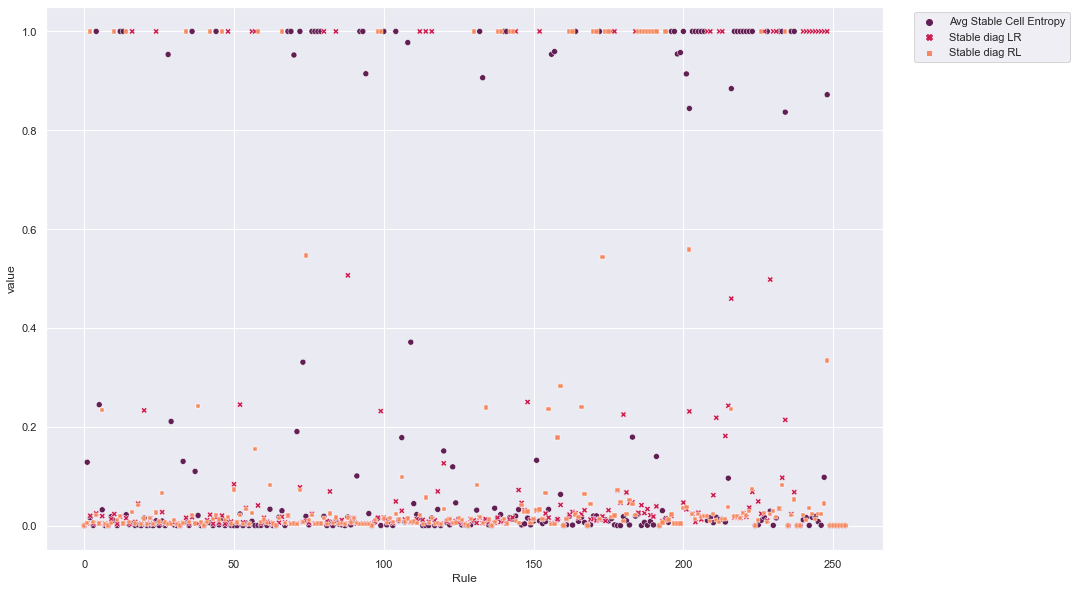

In [15]:
melted = merged.loc[:, [False, True, False, True, True, True]].melt(id_vars='Rule')
sns.set(rc={"figure.figsize":(15, 10)})
g = sns.scatterplot(data=melted,
                    x='Rule', y='value', hue='variable',
                    style='variable', palette='rocket')
g.legend(bbox_to_anchor = (1.03, 1))

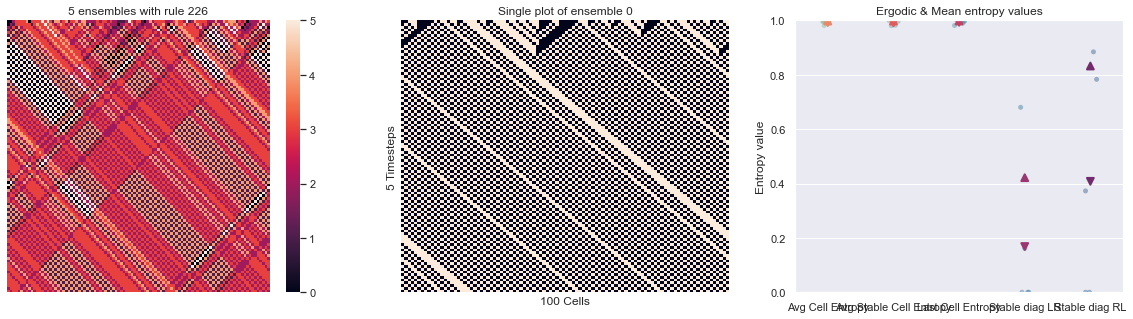

In [33]:
x = CA1DEnsemble(226, 100, 5)
x.run(100)
x.analyse()
x.plot()
x.analysis

,Avg Cell Entropy,Avg Stable Cell Entropy,Last Cell Entropy,Stable diag LR,Stable diag RL,Initial,Kind
0,0.995373,0.995378,0.995378,0.000000,0.657572,0110001010011001101001111110100011011000111111...,ensemble
1,0.997398,0.997402,0.997402,0.433642,0.000000,0000100110010011101010111000010101100011011011...,ensemble
2,0.997396,0.997402,0.997402,0.000000,0.179096,1110010011110011011010001011011101111100010011...,ensemble
3,0.989584,0.989588,0.989588,0.874097,0.000000,0011100101100100011100010001000111101010110100...,ensemble
4,0.997394,0.997402,0.997402,0.886891,0.000000,1010010001001100011111011101000111000000100011...,ensemble
5,0.999711,0.999711,0.999711,0.479494,0.229123,,ergodic
6,0.004283,0.004279,0.004279,0.084606,0.269677,,complexity


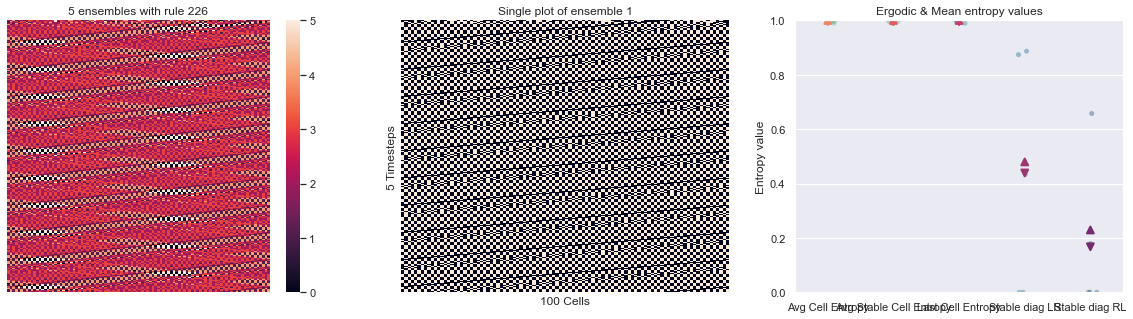

In [38]:
z = CA1DEnsemble(226, 100, 5)
z.run(1000)
z.analyse()
z.plot()
z.analysis

In [ ]:
for i in melted[melted['value'] < 0.1]['Rule']:
    lots[i].plot()

In [ ]:
RULE = 30
CELLS = 200
TIMESTEPS = 10000
REFRESH = [('random', 20), ('sparse', 20), ('simple',1), ('half', 1)]

experiments = []
for spread, count in REFRESH:
    x = CA1DEnsemble(RULE,CELLS,count=count,init=spread,folder="../simulations/automata/results/")
    #x.run(TIMESTEPS, True)
    x.load()
    #x.analyse()
    #x.save()
    experiments.append(x)
    print("completed", spread)